# **Diabetes Prediction System**

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Collection and Analysis**

In [ ]:
# loading the diabetes dataset to a pandas dataframe
diabetes_df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
# printing the first 10 rows of the dataset
diabetes_df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
95,Male,19.0,0,0,never,27.32,6.1,80,0
96,Female,67.0,0,0,never,27.32,6.2,159,1
97,Male,11.0,0,0,No Info,27.32,6.1,90,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0


In [ ]:
# printing number of rows and columns in the dataset
diabetes_df.shape

(100000, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# **Data Preprocessing**

In [ ]:
# Checking for missing values in the entire dataset
missing_values = diabetes_df.isna().sum()
print(missing_values)


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Checking for null values in the dataset
null_values = diabetes_df.isnull().sum()

# Displaying the count of null values for each column
print(null_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Check for duplicate records in the dataset
duplicates = diabetes_df[diabetes_df.duplicated(keep=False)]

# Display the duplicate records
print(duplicates)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
1      Female  54.0             0              0         No Info  27.32   
10     Female  53.0             0              0           never  27.32   
14     Female  76.0             0              0         No Info  27.32   
18     Female  42.0             0              0         No Info  27.32   
41       Male   5.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
1              6.6                   80        

In [ ]:
# Remove duplicate records from the dataset
diabetes_df = diabetes_df.drop_duplicates()

# Display the dataset with duplicates removed
print(diabetes_df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

# **Checking Class Imbalance**

In [ ]:
# Count the number of diabetes and non-diabetes patients
diabetes_counts = diabetes_df['diabetes'].value_counts()
print(diabetes_counts)

diabetes
0    87664
1     8482
Name: count, dtype: int64


***0 --> Non diabetic***


***1 --> Diabetic***

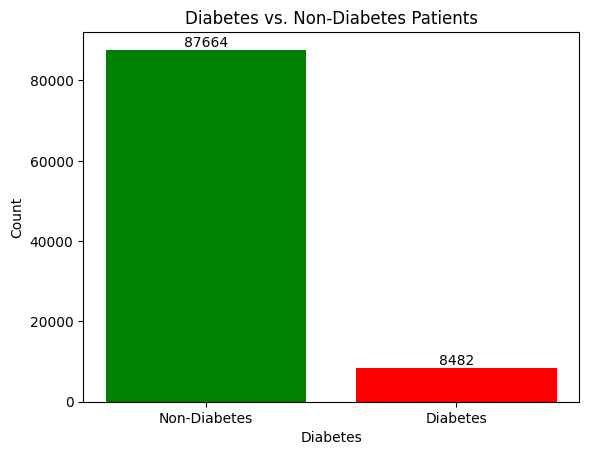

In [ ]:
# Create a bar chart
plt.bar(diabetes_counts.index, diabetes_counts.values, color=['green', 'red'])
plt.title('Diabetes vs. Non-Diabetes Patients')
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Add labels to the bars
for i, count in enumerate(diabetes_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set the x-axis labels
plt.xticks(diabetes_counts.index, ['Non-Diabetes', 'Diabetes'])

# Show the plot
plt.show()

# **Exploratory Data Analysis**

# **Data Visualization**

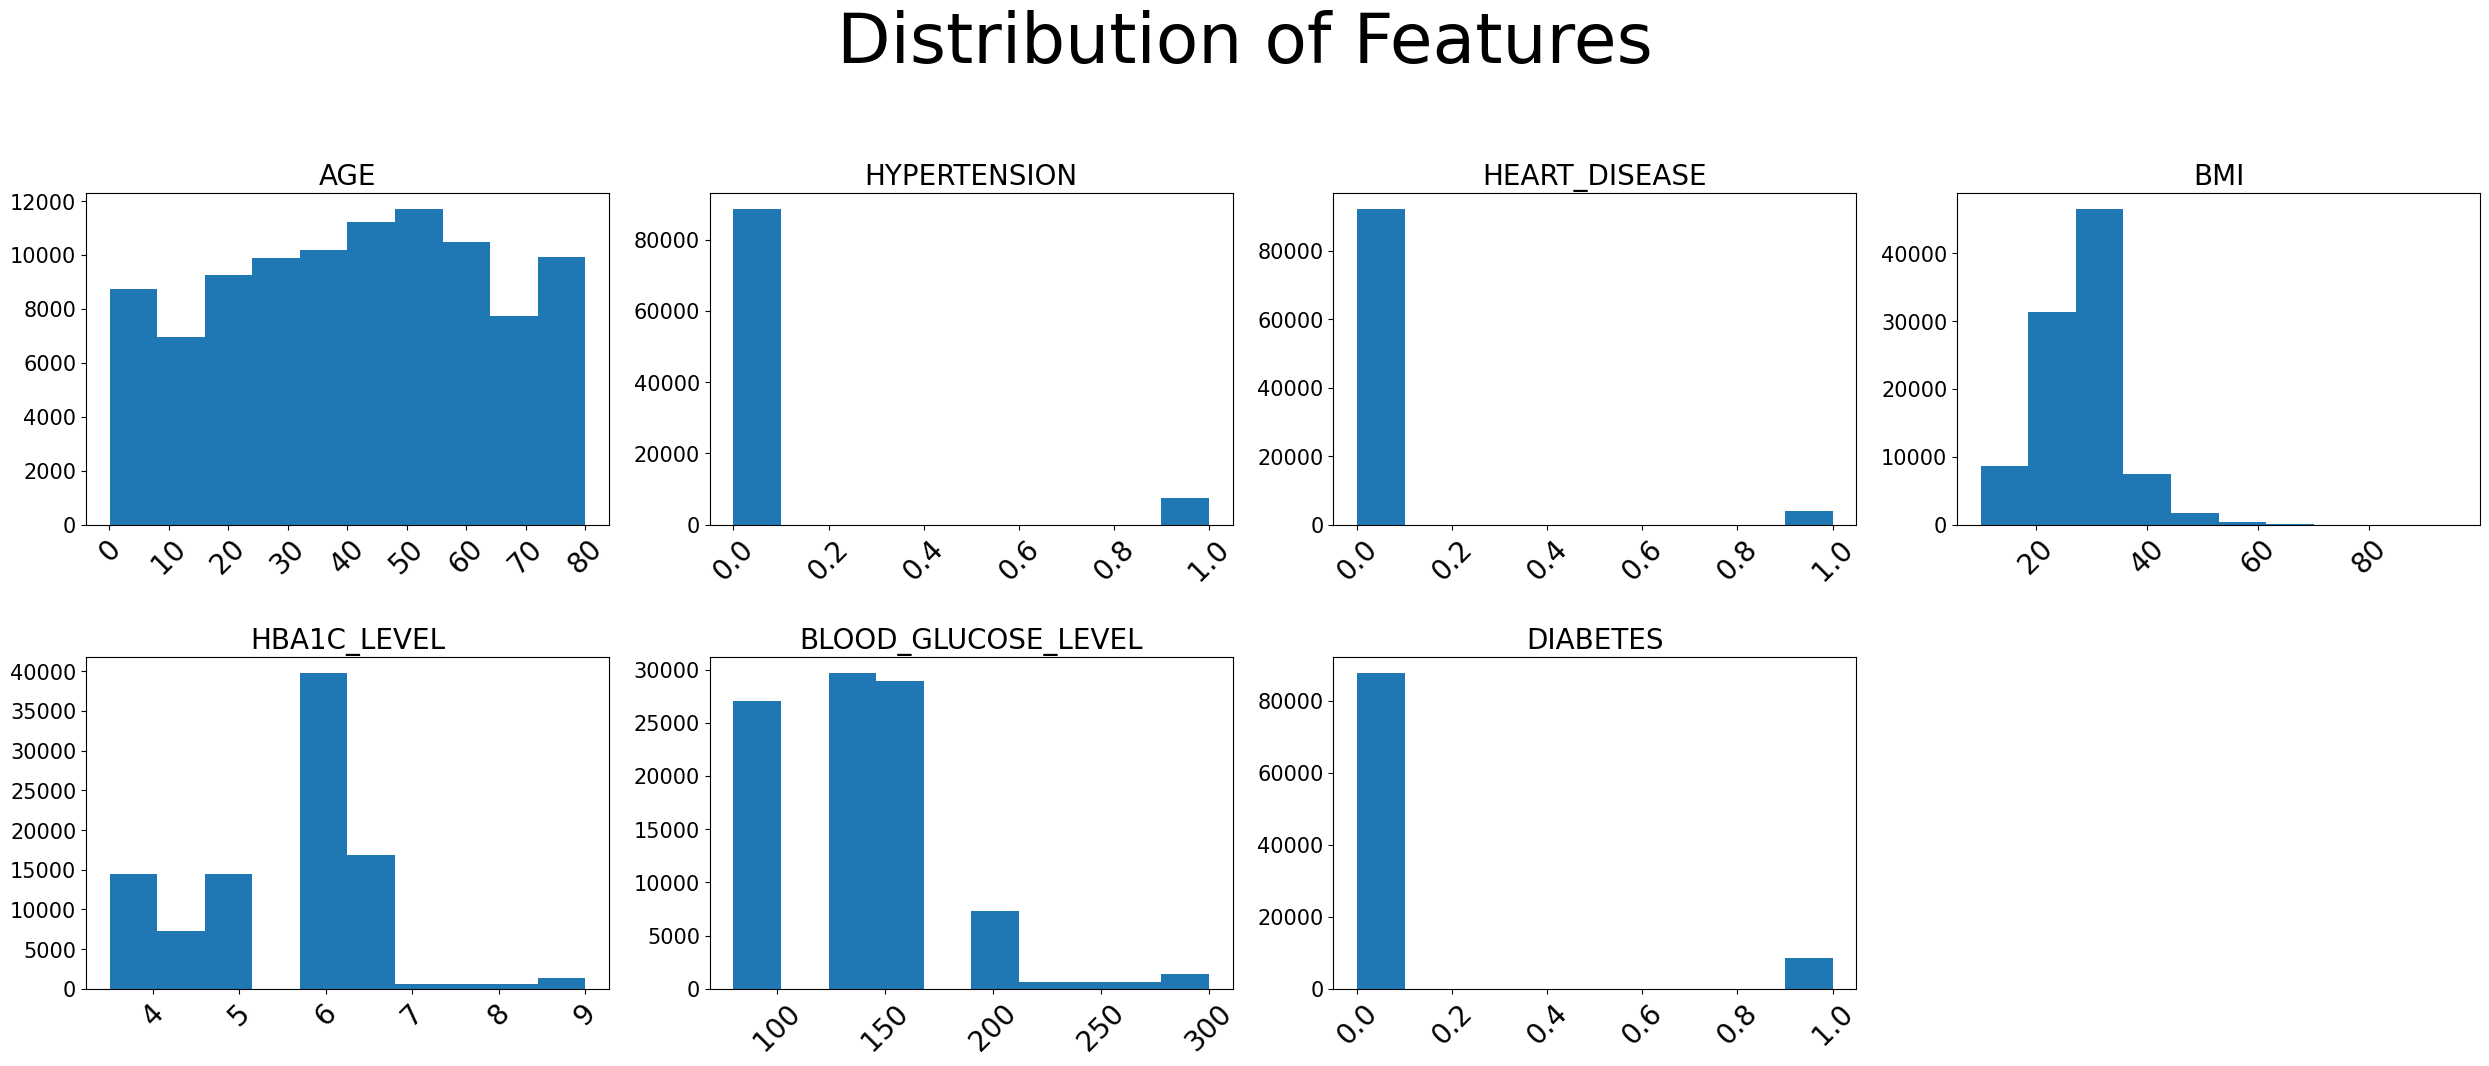

In [ ]:
fig = plt.figure(figsize=(25,15))
st = fig.suptitle("Distribution of Features",fontsize=50,verticalalignment="center")
for col,num in zip(diabetes_df.describe().columns,range(1,11)):
  ax = fig.add_subplot(3,4,num)
  ax.hist(diabetes_df[col])
  plt.grid(False)
  plt.xticks(rotation=45,fontsize=20)
  plt.yticks(fontsize = 15)
  plt.title(col.upper(),fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace=0.4)
plt.show()

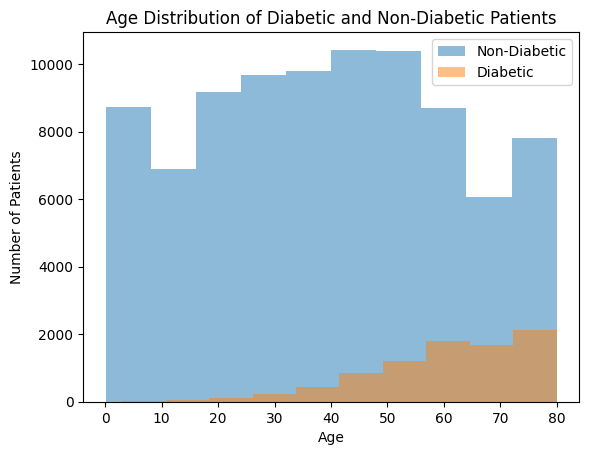

In [ ]:
# Split the data into diabetic and non-diabetic groups
diabetic = diabetes_df[diabetes_df['diabetes'] == 1]
non_diabetic = diabetes_df[diabetes_df['diabetes'] == 0]

# Create two histograms for age distribution
plt.hist(non_diabetic['age'], bins=10, alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic['age'], bins=10, alpha=0.5, label='Diabetic')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Diabetic and Non-Diabetic Patients')

# Add a legend
plt.legend()

# Show the plot
plt.show()


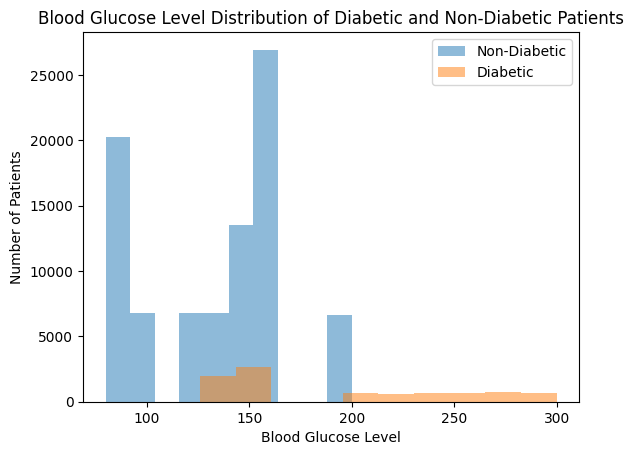

In [ ]:
# Create two histograms for blood glucose level distribution
plt.hist(non_diabetic['blood_glucose_level'], bins=10, alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic['blood_glucose_level'], bins=10, alpha=0.5, label='Diabetic')

# Set labels and title
plt.xlabel('Blood Glucose Level')
plt.ylabel('Number of Patients')
plt.title('Blood Glucose Level Distribution of Diabetic and Non-Diabetic Patients')

# Add a legend
plt.legend()

# Show the plot
plt.show()

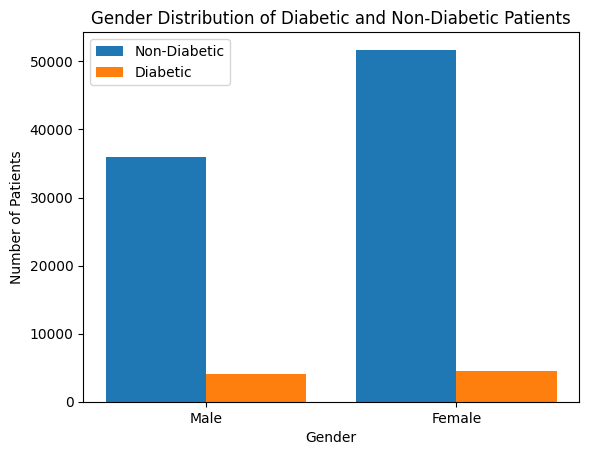

In [ ]:
# Ensure consistent gender categories for both groups
gender_categories = ['Male', 'Female']

# Create bar plots for gender distribution
gender_counts_non_diabetic = diabetes_df[diabetes_df['diabetes'] == 0]['gender'].value_counts()
gender_counts_diabetic = diabetes_df[diabetes_df['diabetes'] == 1]['gender'].value_counts()

# Fill in missing categories with zeros
for category in gender_categories:
    if category not in gender_counts_non_diabetic:
        gender_counts_non_diabetic[category] = 0
    if category not in gender_counts_diabetic:
        gender_counts_diabetic[category] = 0

# Sort the counts by gender categories
gender_counts_non_diabetic = gender_counts_non_diabetic[gender_categories]
gender_counts_diabetic = gender_counts_diabetic[gender_categories]

# Create the bar plot
width = 0.4
x = range(len(gender_categories))
plt.bar(x, gender_counts_non_diabetic, width, label='Non-Diabetic', align='center')
plt.bar([i + width for i in x], gender_counts_diabetic, width, label='Diabetic', align='center')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Gender Distribution of Diabetic and Non-Diabetic Patients')

# Set x-axis ticks and labels
plt.xticks([i + width/2 for i in x], gender_categories)

# Add a legend
plt.legend()

# Show the plot
plt.show()

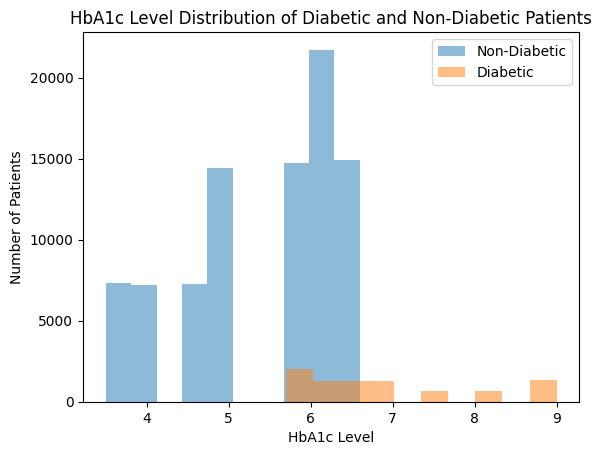

In [ ]:
# Create two histograms for HbA1c level distribution
plt.hist(non_diabetic['HbA1c_level'], bins=10, alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic['HbA1c_level'], bins=10, alpha=0.5, label='Diabetic')

# Set labels and title
plt.xlabel('HbA1c Level')
plt.ylabel('Number of Patients')
plt.title('HbA1c Level Distribution of Diabetic and Non-Diabetic Patients')

# Add a legend
plt.legend()

# Show the plot
plt.show()

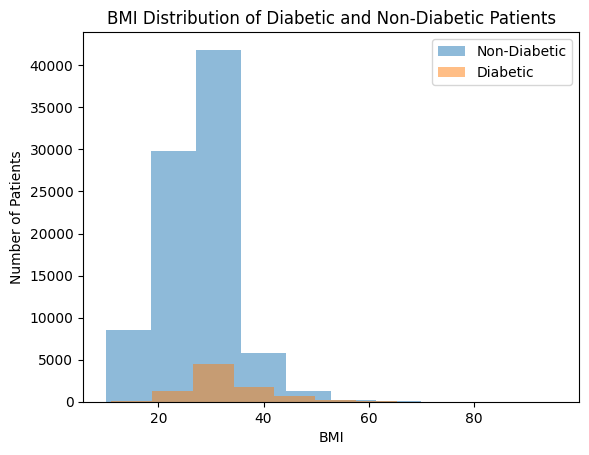

In [ ]:
# Create two histograms for BMI distribution
plt.hist(non_diabetic['bmi'], bins=10, alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic['bmi'], bins=10, alpha=0.5, label='Diabetic')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.title('BMI Distribution of Diabetic and Non-Diabetic Patients')

# Add a legend
plt.legend()

# Show the plot
plt.show()

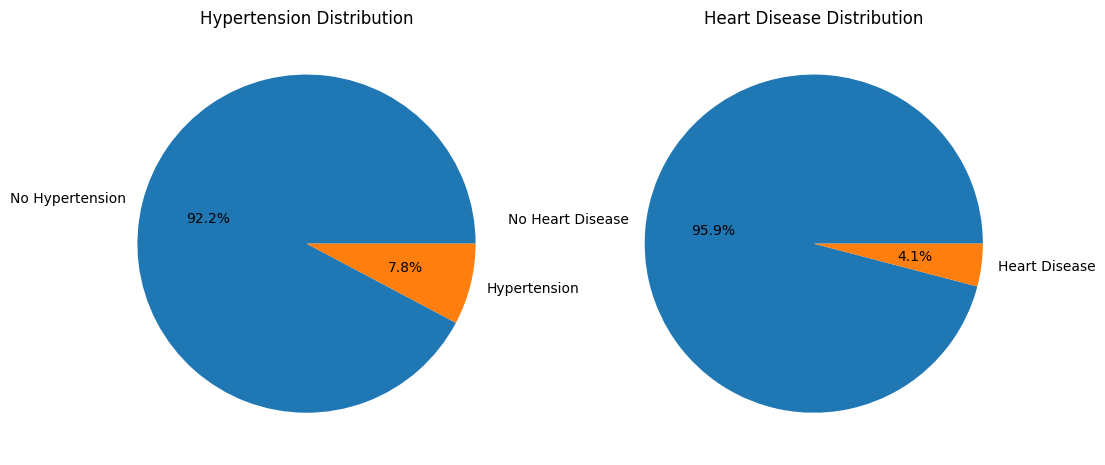

In [ ]:
# Count the occurrences of hypertension and heart disease
hypertension_counts = diabetes_df['hypertension'].value_counts()
heart_disease_counts = diabetes_df['heart_disease'].value_counts()

# Create a pie chart for hypertension
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(hypertension_counts, labels=['No Hypertension', 'Hypertension'], autopct='%1.1f%%')
plt.title('Hypertension Distribution')

# Create a pie chart for heart disease
plt.subplot(1, 2, 2)
plt.pie(heart_disease_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%')
plt.title('Heart Disease Distribution')

plt.show()


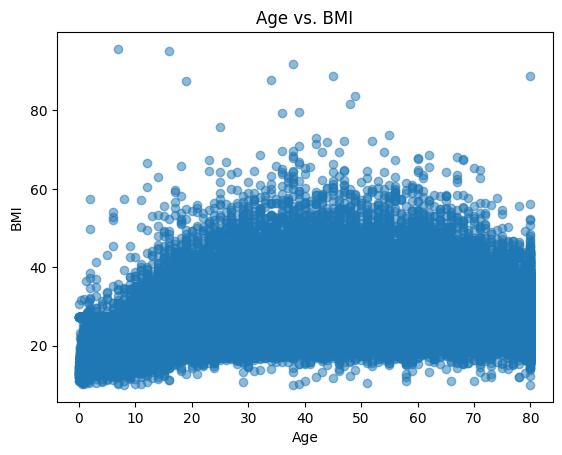

In [ ]:
# Create a scatter plot for age vs. BMI
plt.scatter(diabetes_df['age'], diabetes_df['bmi'], alpha=0.5)
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

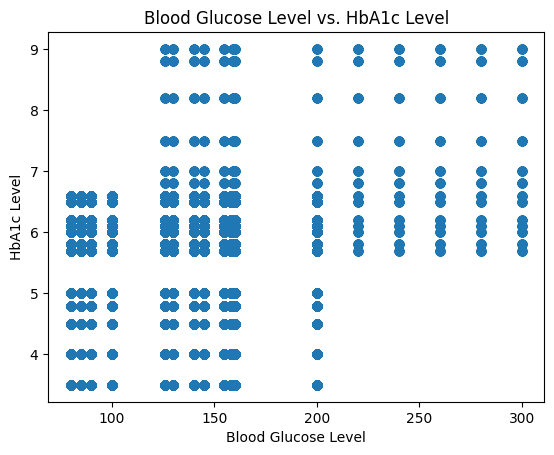

In [ ]:
# Create a scatter plot for blood glucose level vs. HbA1c level
plt.scatter(diabetes_df['blood_glucose_level'], diabetes_df['HbA1c_level'], alpha=0.5)
plt.title('Blood Glucose Level vs. HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()


 From above bar chart we can identify that there is a definite class imbalance between diabetic and non diabetic patients

In [ ]:
# diabetes_df.groupby('diabetes').mean()

Label Encoding for gender

***0 --> Female***

***1 -->Male***

In [ ]:
label_encoder = LabelEncoder()
diabetes_df['gender'] = label_encoder.fit_transform(diabetes_df['gender'])

Label encoding for smoking_history

No info --> 0
current --> 1
ever --> 2
former --> 3
never --> 4
not current --> 5

In [ ]:
unique_values = diabetes_df['smoking_history'].unique()
print(unique_values)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
label_encoder = LabelEncoder()
diabetes_df['smoking_history'] = label_encoder.fit_transform(diabetes_df['smoking_history'])
unique_values = diabetes_df['smoking_history'].unique()
print(unique_values)

[4 0 1 3 2 5]


In [ ]:
# seperating the data and labels
X = diabetes_df.drop(columns = 'diabetes', axis=1)
Y = diabetes_df['diabetes']

In [ ]:
print(X)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
standardized_data = scaler.fit_transform(X)

In [ ]:
print(standardized_data)

[[-8.43459189e-01  1.70083970e+00 -2.90050377e-01 ... -3.14947071e-01
   9.94562951e-01  4.35538650e-02]
 [-8.43459189e-01  5.43372045e-01 -2.90050377e-01 ... -2.15895425e-04
   9.94562951e-01 -1.42309603e+00]
 [ 1.18376945e+00 -6.14095608e-01 -2.90050377e-01 ... -2.15895425e-04
   1.55970122e-01  4.83548835e-01]
 ...
 [ 1.18376945e+00  1.07758788e+00 -2.90050377e-01 ...  7.51422735e-02
   1.55970122e-01  4.10216340e-01]
 [-8.43459189e-01 -7.92167555e-01 -2.90050377e-01 ...  1.19664914e+00
  -1.42803856e+00 -9.34212734e-01]
 [-8.43459189e-01  6.76926005e-01 -2.90050377e-01 ... -7.22767750e-01
   9.94562951e-01 -1.17865438e+00]]


In [ ]:
X = standardized_data
Y = diabetes_df['diabetes']

In [ ]:
print(X)
print(Y)

[[-8.43459189e-01  1.70083970e+00 -2.90050377e-01 ... -3.14947071e-01
   9.94562951e-01  4.35538650e-02]
 [-8.43459189e-01  5.43372045e-01 -2.90050377e-01 ... -2.15895425e-04
   9.94562951e-01 -1.42309603e+00]
 [ 1.18376945e+00 -6.14095608e-01 -2.90050377e-01 ... -2.15895425e-04
   1.55970122e-01  4.83548835e-01]
 ...
 [ 1.18376945e+00  1.07758788e+00 -2.90050377e-01 ...  7.51422735e-02
   1.55970122e-01  4.10216340e-01]
 [-8.43459189e-01 -7.92167555e-01 -2.90050377e-01 ...  1.19664914e+00
  -1.42803856e+00 -9.34212734e-01]
 [-8.43459189e-01  6.76926005e-01 -2.90050377e-01 ... -7.22767750e-01
   9.94562951e-01 -1.17865438e+00]]
0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(96146, 8) (76916, 8) (19230, 8)


# **Implementation of Synthetic Minor Oversampling Technique(SMOTE) to solve Class imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#Fitting SMOTE to the training set
smote = SMOTE(random_state = 27)
smote_X_train, smote_Y_train = smote.fit_resample(X_train,Y_train)

print("Before sampling, Class Distribution:- ",Counter(Y_train))
print("After sampling, Class Distribution:- ",Counter(smote_Y_train))

Before sampling, Class Distribution:-  Counter({0: 70130, 1: 6786})
After sampling, Class Distribution:-  Counter({0: 70130, 1: 70130})


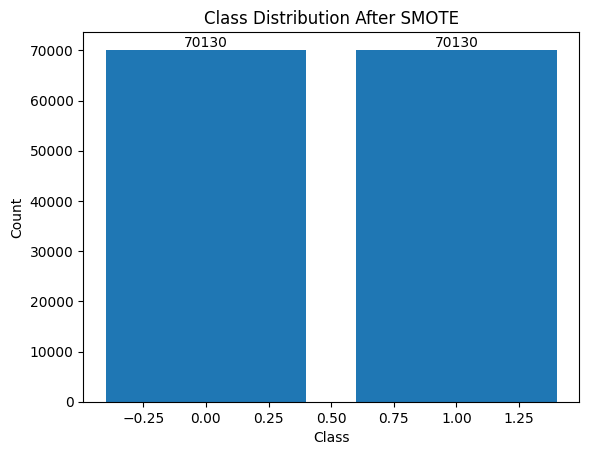

In [ ]:
class_distribution = Counter(smote_Y_train)

# Create a bar chart
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Add labels to the bars
for class_label, count in class_distribution.items():
    plt.text(class_label, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()